In [18]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
import sympy 
from sympy import * 
import math
from numpy.linalg import eig

In [4]:
#matrix:
n=10
L=np.zeros((n,n))


In [14]:
# first and last diagonal element are ones:
L[0,0]=1
L[n-1,n-1]=1
L
for i in range(n):
    for j in range(n):
        if i==j+1:
            L[i,j]=-1
        elif j== i+1:
            L[i,j]=-1
        elif i==j and i!=0 and i!=n-1:
            L[i,j]=2
          
        
        
L

array([[ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.]])

In [6]:
# D: degree matrix: is a diagonal matrix 
# A: is the adjacency matrix
D=np.zeros((n,n))
A=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if i==j:
            D[i,j]=L[i,j]
        else:
            A[i,j]=-L[i,j]
# check:
check=D-A==L # it must give an nxn matrix all 'true' values

In [30]:
# finding eigen values:


eigen_values,eigen_vectors=eig(L)

eigen_values

array([ 3.90211303e+00,  3.61803399e+00,  3.17557050e+00,  2.61803399e+00,
        2.00000000e+00,  1.38196601e+00,  8.24429495e-01, -1.08257372e-16,
        9.78869674e-02,  3.81966011e-01])

notice here that we have an eigen value= -1.09257372 x 10^(-16) which is roughly equals to zero
then, we can assume that the assumption of having atleast one zero eigen value is correct. and will adjust the eigen value according to this`

In [31]:
eigen_vectors[7]

array([ 3.16227766e-01, -4.47213595e-01,  3.16227766e-01,  7.90911156e-16,
       -3.16227766e-01, -4.47213595e-01,  3.16227766e-01,  3.16227766e-01,
       -3.16227766e-01,  1.35149979e-16])

In [6]:

# random walk network using adnjacency matrix:
def random_adjacency_matrix(n):   
    matrix = [[random.randint(0, 1) for i in range(n)] for j in range(n)]

    # No vertex connects to itself
    for i in range(n):
        matrix[i][i] = 0

    # If i is connected to j, j is connected to i
    for i in range(n):
        for j in range(n):
            matrix[j][i] = matrix[i][j]

    return matrix

random_adjacency_matrix(10)

[[0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
 [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
 [0, 1, 0, 1, 0, 1, 1, 0, 1, 1],
 [0, 0, 1, 0, 1, 0, 1, 1, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 1, 1, 0]]

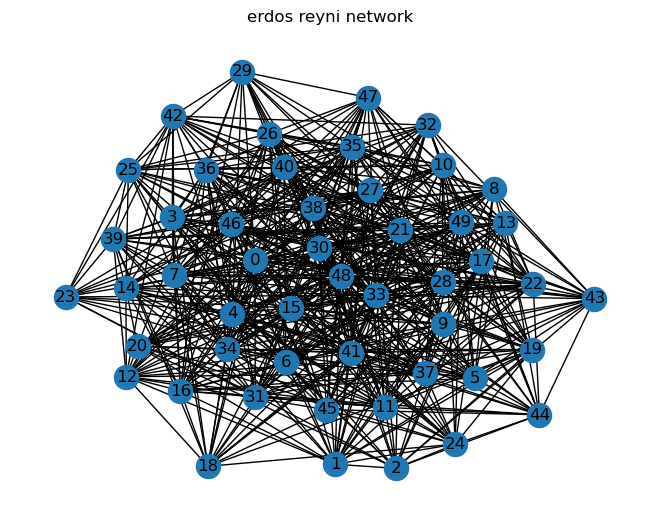

In [41]:
# erdos reiny network:
# representing the graph:

# Use seed for reproducibility
G= nx.erdos_renyi_graph(50,0.5) 
nx.draw(G, with_labels=True)
plt.title('erdos reyni network')
plt.show()


In [38]:
adj=nx.adjacency_matrix(G)
print(adj.todense())

for in range (np.shape(adj.todense()[0]

[[0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 1 1 ... 0 0 1]
 [1 0 1 ... 0 0 0]
 [1 1 1 ... 1 0 0]]


C:\Users\Abu El Bish\AppData\Local\Temp\ipykernel_19432\2062514391.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj=nx.adjacency_matrix(G)


(50, 50)

In [36]:
# getting laplacian for erdos reiny:
erdos_laplacian=nx.laplacian_matrix(G)
print(erdos_laplacian.todense())

[[17  0  0 ...  0 -1 -1]
 [ 0 19  0 ... -1  0 -1]
 [ 0  0 22 ... -1 -1 -1]
 ...
 [ 0 -1 -1 ... 27  0 -1]
 [-1  0 -1 ...  0 25  0]
 [-1 -1 -1 ... -1  0 22]]


<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


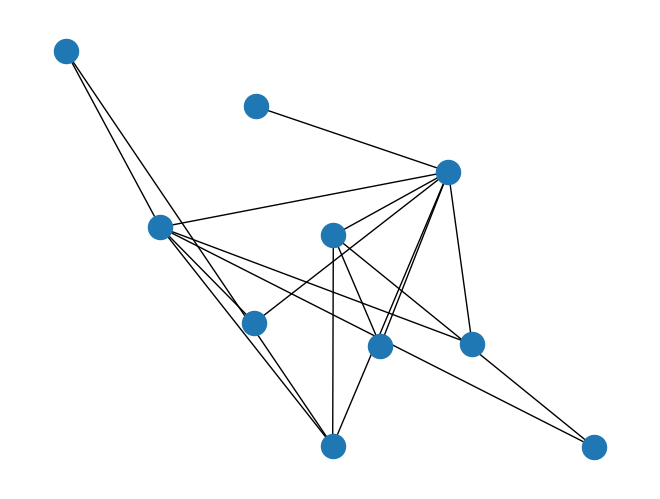

In [12]:
# for albert graph:
node_number = 10 # randomly chosen
initial_nodes = 2 # randomly chosen
albert_G = networkx.barabasi_albert_graph(node_number, initial_nodes)

nx.draw(albert_G,pos=pos)

In [13]:
# getting the adjacency matrix for albert graph:
albert_adj=nx.adjacency_matrix(albert_G)
print(albert_adj.todense())

[[0 1 1 1 1 0 0 1 1 1]
 [1 0 0 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 1 0 0 0]
 [1 0 0 1 0 1 1 1 0 1]
 [0 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0]]


C:\Users\Abu El Bish\AppData\Local\Temp\ipykernel_19904\889101374.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  albert_adj=nx.adjacency_matrix(albert_G)


In [14]:
albert_laplacian=nx.laplacian_matrix(albert_G)
print(albert_laplacian.todense())

[[ 7 -1 -1 -1 -1  0  0 -1 -1 -1]
 [-1  4  0 -1  0 -1  0  0 -1  0]
 [-1  0  1  0  0  0  0  0  0  0]
 [-1 -1  0  4 -1  0 -1  0  0  0]
 [-1  0  0 -1  6 -1 -1 -1  0 -1]
 [ 0 -1  0  0 -1  2  0  0  0  0]
 [ 0  0  0 -1 -1  0  2  0  0  0]
 [-1  0  0  0 -1  0  0  2  0  0]
 [-1 -1  0  0  0  0  0  0  2  0]
 [-1  0  0  0 -1  0  0  0  0  2]]


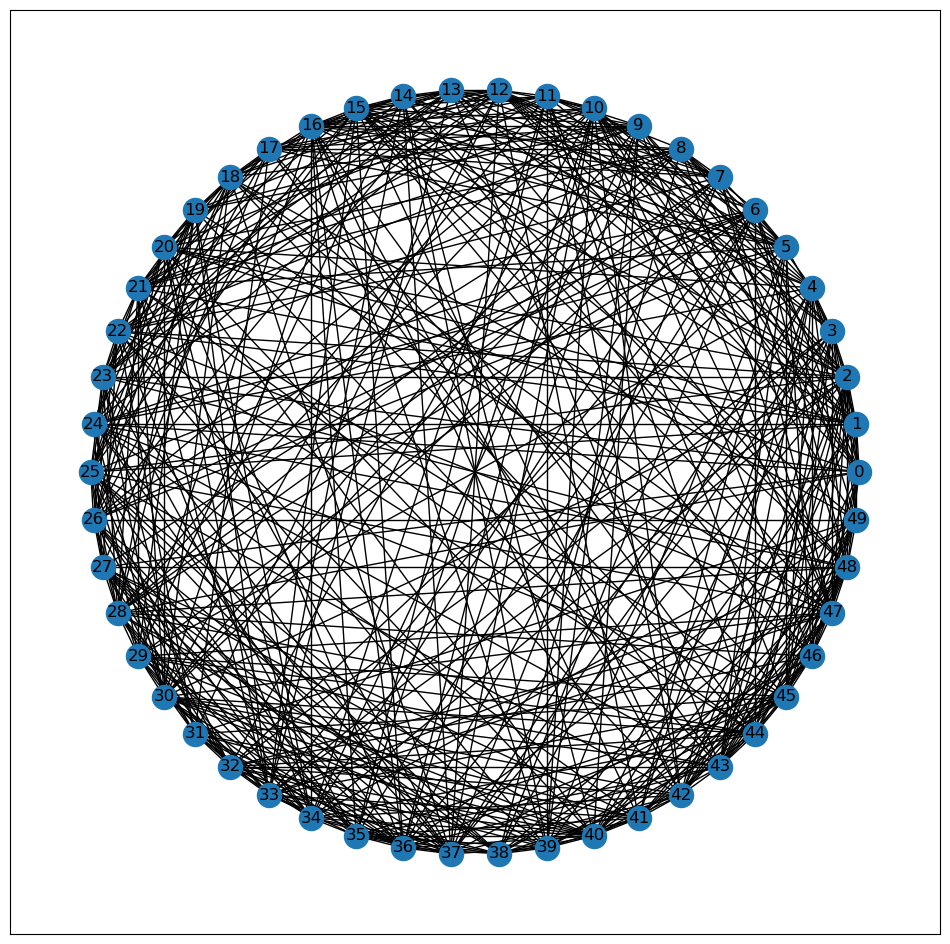

In [16]:
l=np.arange(1,100,1)
z=np.arange(1,50,1)
small_world_G = nx.watts_strogatz_graph(n = 50, k = 20, p = 0.5)
pos = nx.circular_layout(small_world_G)
plt.figure(figsize = (12, 12))
nx.draw_networkx(small_world_G, pos)

In [17]:
small_world_matrix=nx.adjacency_matrix(small_world_G)
print(small_world_matrix.todense())

[[0 1 1 ... 1 1 0]
 [1 0 1 ... 1 0 1]
 [1 1 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 0]
 [1 0 1 ... 1 0 1]
 [0 1 1 ... 0 1 0]]


C:\Users\Abu El Bish\AppData\Local\Temp\ipykernel_19904\1753818197.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  small_world_matrix=nx.adjacency_matrix(small_world_G)


In [18]:
small_world_laplacian=nx.laplacian_matrix(small_world_G)
print(small_world_laplacian.todense())

[[19 -1 -1 ... -1 -1  0]
 [-1 19 -1 ... -1  0 -1]
 [-1 -1 26 ... -1 -1 -1]
 ...
 [-1 -1 -1 ... 24 -1  0]
 [-1  0 -1 ... -1 23 -1]
 [ 0 -1 -1 ...  0 -1 18]]


In [25]:
# tight binding :
# small world:

# create a small world first, and view it:
    
tight_small_world_G = nx.watts_strogatz_graph(n = 50, k =30, p = 0.5)
    
# find the laplacian and get its eigenvalues:

tight_small_world_laplacian=nx.laplacian_matrix(tight_small_world_G)

small_tight_eigen_values = np.linalg.eigvals(tight_small_world_laplacian.toarray())

small_tight_eigen_values


array([-1.00111491e-14,  3.90028584e+01,  2.26877459e+01,  2.33869331e+01,
        2.35001349e+01,  3.75801819e+01,  3.73781788e+01,  3.69339257e+01,
        2.43524795e+01,  3.64913987e+01,  3.63633523e+01,  3.59697686e+01,
        2.47735538e+01,  2.50636851e+01,  3.55110530e+01,  3.51364816e+01,
        3.48769762e+01,  3.44255310e+01,  3.41939560e+01,  3.40444908e+01,
        3.37481938e+01,  2.55751859e+01,  2.58991405e+01,  2.61075208e+01,
        3.32771485e+01,  3.29884348e+01,  2.66363497e+01,  2.68922313e+01,
        2.69211798e+01,  3.25076697e+01,  3.21545638e+01,  3.19639967e+01,
        3.17621929e+01,  3.14998531e+01,  3.12988519e+01,  3.11646932e+01,
        3.08508009e+01,  3.05226145e+01,  3.03152083e+01,  3.01520293e+01,
        2.98698949e+01,  2.78459906e+01,  2.77567147e+01,  2.80925165e+01,
        2.82071759e+01,  2.94082567e+01,  2.84464393e+01,  2.85898161e+01,
        2.90437046e+01,  2.88289463e+01])

In [20]:

# now we know that since the hamiltonian is represented as : H= alpha i + beta (lamda), where alpha = 0 and beta is -1
#then our hamiltonian is just: H=-lamda which is the eigen values we just got.

#partition function is the summation : exp(beta H), them:
# we'll use b to symbolize for beta
b= symbols('b')

small_world_partition_fn=[]
for i in small_tight_eigen_values:
    small_world_partition_fn+=[exp(i*b)]
    
z=np.array(sum(small_world_partition_fn))
                    
# to get the entropy: it is the derivative of the partition fn with respect to beta, then:

entropy = Derivative(z,b)

# helmotz free energy is has the formula:kBTlnz  when z is the partition fn, and kT here is beta,then:
#since we don't have a certain value B will define it as a variable here.
B= symbols('B')

helmotz=[]
for i in (small_world_partition_fn):
    helmotz+=[B*b*log(i)]
# to find the Gibbs free energy: we know that it has the formula of: -KT(ln(z)-dz/dv). 
# we already know that p=(n/V)KT, we can use it to get that 1/dv =(p/NK)(1/dT). therefore:
K=1.380649 * 10**(-23)
T=symbols('T')
V=symbols('V')
N=symbols('N')
P=symbols('P')
small_world_partition_fn_V=[]
# change the variable beta now in z to its relation with v, so that python can know how to derive it with respect to v:
for i in small_tight_eigen_values:
    small_world_partition_fn_V+=[exp(i*P*V/N)]
    
# gibbs free energy:

for i in (small_world_partition_fn):
    gibbs_energy=-K*T*(log(i,2)-Derivative(log(i,2),V))
    

In [21]:
# now we need to repeat the same process for the other two networks: erdos and albert:

In [27]:
# erdos:

#create network:
n = 10  # 10 nodes
m = 20  # 20 edges
seed = 20160  # seed random number generators for reproducibility

tight_erdos_G = nx.gnm_random_graph(n, m, seed=seed)

# get laplacian and its eigenvalues:


tight_erdos_laplacian=nx.laplacian_matrix(tight_erdos_G)

tight_erdos_eigen_values = np.linalg.eigvals(tight_erdos_laplacian.toarray())

tight_erdos_eigen_values

array([0.        , 7.47810677, 7.16813093, 1.35882376, 2.16077796,
       3.16505286, 5.40795386, 4.        , 4.50320987, 4.75794399])

In [30]:
erdos_partition_fn=[]
for i in tight_erdos_eigen_values:
    erdos_partition_fn+=[exp(i*b)]
    
z=np.array(sum(erdos_partition_fn))

entropy = Derivative(z,b)

helmotz=[]
for i in (erdos_partition_fn):
    helmotz+=[B*b*log(i)]

K=1.380649 * 10**(-23)

erdos_partition_fn_V=[]
# change the variable beta now in z to its relation with v, so that python can know how to derive it with respect to v:
for i in tight_erdos_eigen_values:
    erdos_partition_fn_V+=[exp(i*P*V/N)]
    
# gibbs free energy:

for i in (erdos_partition_fn):
    gibbs_energy=-K*T*(log(i,2)-Derivative(log(i,2),V))
    


In [32]:
# finally for albert netwrok:

node_number = 10 # randomly chosen
initial_nodes = 2 # randomly chosen
albert_G = networkx.barabasi_albert_graph(node_number, initial_nodes)

albert_laplacian=nx.laplacian_matrix(albert_G)

albert_eigen_values = np.linalg.eigvals(albert_laplacian.toarray())

albert_eigen_values

array([ 8.17176096e+00,  6.22050978e+00,  4.60385204e+00, -1.29286579e-15,
        3.59941450e+00,  3.13862884e+00,  8.76674374e-01,  1.61214025e+00,
        1.77701926e+00,  2.00000000e+00])

In [33]:
albert_partition_fn=[]
for i in albert_eigen_values:
    albert_partition_fn+=[exp(i*b)]
    
z=np.array(sum(albert_partition_fn))

entropy = Derivative(z,b)

helmotz=[]
for i in (albert_partition_fn):
    helmotz+=[B*b*log(i)]

K=1.380649 * 10**(-23)

albert_partition_fn_V=[]
# change the variable beta now in z to its relation with v, so that python can know how to derive it with respect to v:
for i in albert_eigen_values:
    albert_partition_fn_V+=[exp(i*P*V/N)]
    
# gibbs free energy:

for i in (albert_partition_fn):
    gibbs_energy=-K*T*(log(i,2)-Derivative(log(i,2),V))



# With this we would have calculated the partition function, enrtropy, helmotz and gibbs free energy of the three networks: albert, erdos and small world.

C:\Users\Abu El Bish\AppData\Local\Temp\ipykernel_19432\360388959.py:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj=nx.adjacency_matrix(G)
<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


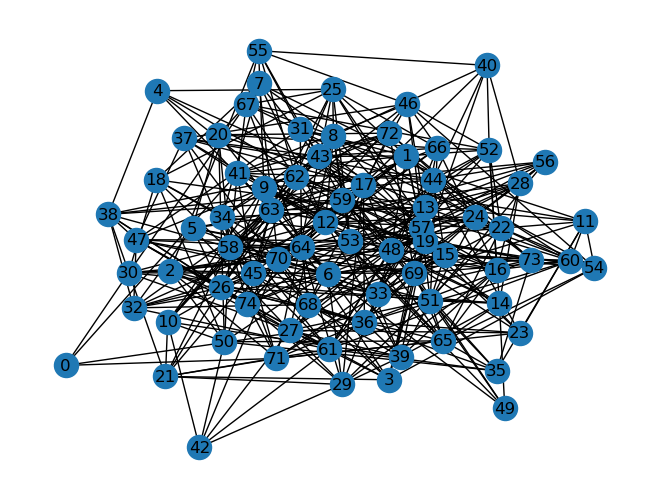

In [79]:
# density of Erdis-renyi network:
#consider an Erdos Renyi network of random number of nodes with random rewiring probabilities:

N=random.randrange(20,100) # number of nodes
p=random.uniform(0,1) # rewiring probability

G= nx.erdos_renyi_graph(N,p) 
nx.draw(G, with_labels=True)
adj=nx.adjacency_matrix(G)

erdos_laplacian=nx.laplacian_matrix(G)


# get the eigen values of the laplacian matrix:

eigen_values_erdos,eigen_vectors_erdos=np.linalg.eig(erdos_laplacian.todense())


In [80]:
eigen_values_erdos

array([3.55271368e-15, 2.12028739e+01, 2.07851641e+01, 2.01446689e+01,
       1.96579507e+01, 3.49755830e+00, 1.91766143e+01, 1.86030320e+01,
       1.84384671e+01, 1.79666491e+01, 1.77891210e+01, 4.38088635e+00,
       1.75315328e+01, 1.70776302e+01, 1.69191586e+01, 4.73052252e+00,
       5.10434561e+00, 5.29296241e+00, 1.63686147e+01, 1.61263145e+01,
       5.62555224e+00, 5.79240838e+00, 5.92421774e+00, 6.13019412e+00,
       1.55846770e+01, 1.54388174e+01, 1.53591606e+01, 1.51071659e+01,
       1.49229040e+01, 6.43050230e+00, 1.46486901e+01, 1.44933027e+01,
       1.43931964e+01, 1.41643383e+01, 1.39929459e+01, 6.73258093e+00,
       6.86315767e+00, 6.93191722e+00, 7.11342374e+00, 7.26214719e+00,
       7.47766451e+00, 7.42753917e+00, 1.37088028e+01, 7.85374558e+00,
       8.02005698e+00, 8.13216822e+00, 8.30316009e+00, 1.33957848e+01,
       1.33608361e+01, 1.31268470e+01, 1.28107022e+01, 1.27161255e+01,
       1.25571314e+01, 1.24563984e+01, 1.22634996e+01, 1.21215170e+01,
      

In [81]:
# now to get the density: we need to sum over all the values of rho using the given formula:
p=0.2
N=100
r=np.sqrt(N*p*(1-p))
def density(eigen_v):
    eigen_values=[]
    for i in eigen_v:
        eigen_values+=[(np.sqrt(np.abs(4-i**2)))/(2*np.pi)]
        
    return eigen_values

rho=sum(density(eigen_values_erdos))
print('the density of our interesting Erdos-Renyi network is:',rho)

the density of our interesting Erdos-Renyi network is: 135.06166056680337


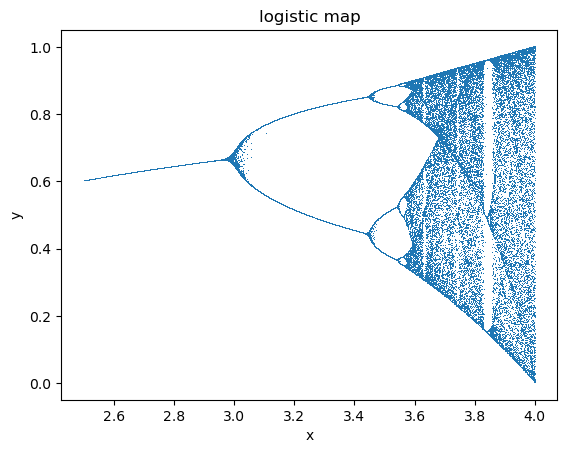

In [84]:
# generating logistic map:
R=np.linspace(2.5,4,100000) # control parameter range
X=[] #x-axis r control parameters
Y=[] #y-axis x control of the logistic map

# generate x for each value of r:

for r in R:
    X.append(r)
    x=np.random.random() # initialize x for each r value
    for n in range(100):
        x=r*x*(1-x)
        
    Y.append(x)
# plot the results:

plt.plot(X,Y,ls='',marker=',')
plt.xlabel('x')
plt.ylabel('y')
plt.title('logistic map')
plt.show()

In [89]:
# to get a random number generator from teh chaotic regime:
# specify how many random you want, c:

c=random.randrange(len(R))
random_numbers=[]
for i in range(c):
    rand=random.randrange(len(R))
    random_numbers+=[Y[rand]]
    

[0.7599716513111925,
 0.7275444219136178,
 0.9355309153638264,
 0.6324998346232715,
 0.6592116992532437,
 0.44335418863611825,
 0.8185949002471165,
 0.4522218907900627,
 0.6533303646506955,
 0.6369092681651285,
 0.6017753034502533,
 0.5904735643946933,
 0.8047920422219292,
 0.3930995865108325,
 0.6571003352238531,
 0.6123145633552184,
 0.847774318786165,
 0.6144222927836483,
 0.9035995668917733,
 0.6399351876846723,
 0.6270704787903538,
 0.7588626966212679,
 0.4561574989626775,
 0.5700557456750015,
 0.3330896108319016,
 0.8114523510617762,
 0.838923132836124,
 0.34558289616435034,
 0.885967980415359,
 0.4686806341638132,
 0.7509576298987967,
 0.570882409382614,
 0.8587772866088076,
 0.44740550347945,
 0.4664892696976014,
 0.9131926115204229,
 0.6265398383274792,
 0.5122642960593498,
 0.6578279859852207,
 0.4503107201297123,
 0.3006054802517677,
 0.7355351246985795,
 0.2495359662142889,
 0.7374980576604407,
 0.5251026571987919,
 0.6394054457536811,
 0.6391224090981023,
 0.37067493676831